In [1]:
'''
【课程1.4】  统计分析

统计指标对定量数据进行统计描述，常从集中趋势和离中趋势两个方面进行分析

集中趋势度量 / 离中趋势度量

'''

'\n【课程1.4】  统计分析\n\n统计指标对定量数据进行统计描述，常从集中趋势和离中趋势两个方面进行分析\n\n集中趋势度量 / 离中趋势度量\n\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [5]:
# 1、集中趋势度量
# 指一组数据向某一中心靠拢的倾向，核心在于寻找数据的代表值或中心值 —— 统计平均数
# 算数平均数、位置平均数
# （1）算数平均数

data = pd.DataFrame({'value':np.random.randint(100,120,100),
                     'f':np.random.rand(100)})

data['f'] = data['f'] / data['f'].sum()     # f为权重，这里将f列设置成总和为1的权重占比
print(data.head())
print('---------')

mean = data['value'].mean()
print(f'算术平均数的值是:{mean}')           # 简单算数平均值 = 总和 / 样本数量 （不涉及权重）

mean_w = (data['value']*data['f']).sum() / data['f'].sum()
print(f'加权平均数的值是{mean_w}')


   value         f
0    118  0.020502
1    118  0.005692
2    115  0.003408
3    111  0.001139
4    102  0.004309
---------
算术平均数的值是:110.25
加权平均数的值是109.84104447539163


众数是: 0    115
1    119
dtype: int32
中位数数:111.0


Text(115.25,0.015,'中位数:111')

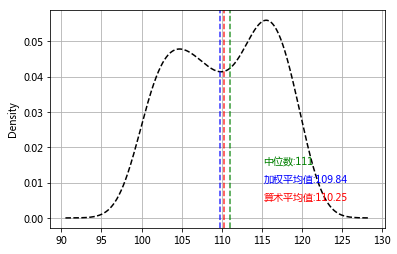

In [16]:
# 1、集中趋势度量
# （2）位置平均数

m = data['value'].mode()        # 众数是一组数据中出现次数最多的数，这里可能返回多个值
print('众数是:',m)

med = data['value'].median()    # 中位数指将总体各单位标志按照大小顺序排列后，中间位置的数字
print(f'中位数数:{med}')

data['value'].plot(kind='kde',style='--k',grid=True)  # 密度曲线

plt.axvline(mean,hold=None,color='r',linestyle='--',alpha=0.8)
plt.text(mean+5,0.005,'算术平均值:%.2f'%mean,color='r')
plt.axvline(mean_w,hold=None,color='b',linestyle='--',alpha=0.8)
plt.text(mean+5,0.01,'加权平均值:%.2f'%mean_w,color='b')
plt.axvline(med,hold=None,color='g',linestyle='--',alpha=0.8)
plt.text(mean+5,0.015,'中位数:%.f'%med,color='g')

                A_sale      B_sale
2017-06-01  824.198913   44.317356
2017-06-02  526.263784  469.397230
2017-06-03  424.483541  902.166002
2017-06-04  908.134872  337.518273
2017-06-05  537.899566  742.125692
------
A销售额的极差是:938.7923459480229.B销售额的极差是:980.9216805828693
------
A销售的分为差为:542.4675287136592.B销售的分为差为:490.4222980093233
------


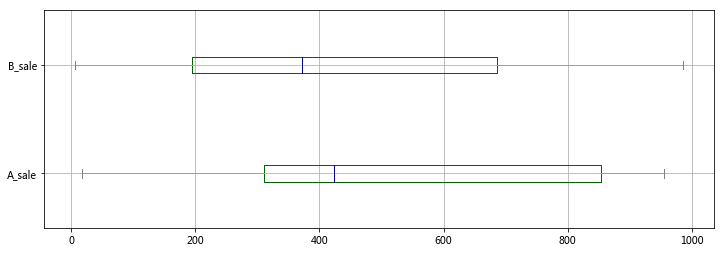

In [21]:
# 2、离中趋势度量
# 指一组数据中各数据以不同程度的距离偏离中心的趋势
# 极差与分位差、方差与标准差、离散系数

data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,     # 创建数据
                    'B_sale':np.random.rand(30)*1000},     # A/B销售额量级在同一水平
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')

a_r = data['A_sale'].max() - data['A_sale'].min()          # 极差
b_r = data['B_sale'].max() - data['B_sale'].min()          # 没有考虑中间变量的变动，测定离中趋势不稳定
print(f'A销售额的极差是:{a_r}.B销售额的极差是:{b_r}')
print('------')

sta = data['A_sale'].describe()
stb = data['B_sale'].describe()
#print(sta)
#print(stb)
a_iqr = sta.loc['75%'] - sta.loc['25%']
b_iqr = stb.loc['75%'] - stb.loc['25%']
print(f'A销售的分为差为:{a_iqr}.B销售的分为差为:{b_iqr}')
print('------')
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False,grid=True,color=color,figsize=(12,4))

A销售额的标准差:284.20,B销售额的标准差:287.73
A销售额的方差:80767.02,B销售额的方差是:82785.70


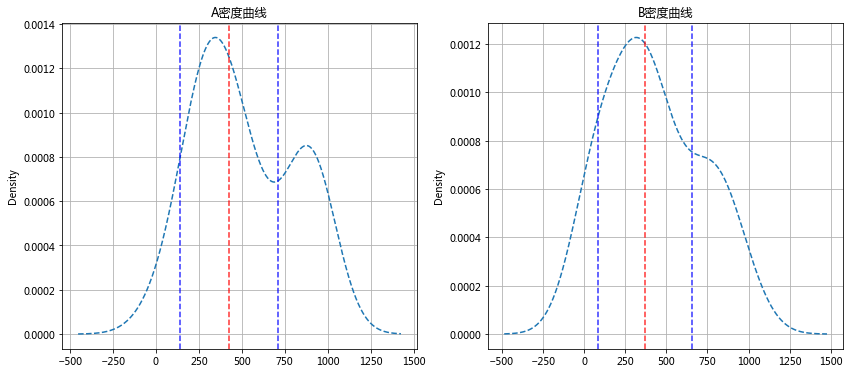

In [26]:
# 2、离中趋势度量
# （2）方差与标准差

a_std = sta.loc['std']
b_std = stb.loc['std']
a_var = data['A_sale'].var()
b_var = data['B_sale'].var()
print('A销售额的标准差:%.2f,B销售额的标准差:%.2f'%(a_std,b_std))
print('A销售额的方差:%.2f,B销售额的方差是:%.2f'%(a_var,b_var))
'''
 方差 → 各组中数值与算数平均数离差平方的算术平均数
 标准差 → 方差的平方根
 标准差是最常用的离中趋势指标 → 标准差越大，离中趋势越明显
'''
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1,2,1)
data['A_sale'].plot(kind='kde',style='--',grid=True,title='A密度曲线')       # A密度曲线，1个标准差
plt.axvline(sta.loc['50%'],hold=None,color='r',alpha=0.8,linestyle='--')
plt.axvline(sta.loc['50%']-a_std,hold=None,color='b',alpha=0.8,linestyle='--')
plt.axvline(sta.loc['50%']+a_std,hold=None,color='b',alpha=0.8,linestyle='--')

ax2 = fig.add_subplot(1,2,2)
data['B_sale'].plot(kind='kde',style='--',grid=True,title='B密度曲线')       # B密度曲线，1个标准差
plt.axvline(stb.loc['50%'],hold=None,color='r',alpha=0.8,linestyle='--')
plt.axvline(stb.loc['50%']-b_std,hold=None,color='b',alpha=0.8,linestyle='--')
plt.axvline(stb.loc['50%']+b_std,hold=None,color='b',alpha=0.8,linestyle='--')